In [1]:
library(data.table)
library(cowplot)
library(ggpubr)
library(Matrix)
library(BuenColors)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:cowplot’:

    get_legend

Loading required package: MASS


#### define functions

In [2]:
plot_umap <- function(df_umap,labels,title='UMAP',colormap=colormap){
    set.seed(2019) 
    df_umap = data.frame(cbind(df_umap,labels),stringsAsFactors = FALSE)
    colnames(df_umap) = c('umap1','umap2','celltype')
    df_umap$umap1 = as.numeric(df_umap$umap1)
    df_umap$umap2 = as.numeric(df_umap$umap2)
    options(repr.plot.width=4, repr.plot.height=4)
    p <- ggplot(shuf(df_umap), aes(x = umap1, y = umap2, color = celltype)) +
      geom_point(size = 1) + scale_color_manual(values = colormap) +
      ggtitle(title)
    return(p)
}

### Input

In [3]:
workdir = './output/'
path_fig = paste0(workdir,'figures/')
system(paste0('mkdir -p ',path_fig))

In [4]:
path_umap = paste0(workdir,'umap_rds/')

In [5]:
se = readRDS(paste0(workdir,'se.rds'))

In [6]:
se

class: RangedSummarizedExperiment 
dim: 80000 1200 
metadata(0):
assays(1): counts
rownames(80000): chr1_10371_10621 chr1_115582_115832 ...
  chrX_154842448_154842698 chrX_154862148_154862398
rowData names(0):
colnames(1200): CMP_1 CMP_2 ... P8_1199 P8_1200
colData names(1): label

In [7]:
for (df in sapply(strsplit(list.files(path_umap), "\\."),'[',1)){
  assign(df,readRDS(paste0(path_umap,df,'.rds')))
}

In [8]:
ls()

[1] "df"                      "df_umap_BROCKMAN"       
 [3] "df_umap_chromVAR_kmer"   "df_umap_chromVAR_kmer2" 
 [5] "df_umap_chromVAR_motif"  "df_umap_chromVAR_motif2"
 [7] "df_umap_Cicero"          "df_umap_Cicero2"        
 [9] "df_umap_cisTopic"        "df_umap_control"        
[11] "df_umap_Cusanovich2018"  "df_umap_GeneScoring"    
[13] "df_umap_GeneScoring2"    "df_umap_scABC"          
[15] "df_umap_Scasat"          "df_umap_SCRAT"          
[17] "df_umap_SCRAT2"          "df_umap_SnapATAC"       
[19] "path_fig"                "path_umap"              
[21] "plot_umap"               "se"                     
[23] "workdir"

In [9]:
labels = se@colData$label

eryth_color_maps <- c("P1" = "#3b82ae", "P2" = "#547294", "P3" = "#6d617a", "P4" = "#865160", 
                      "P5" = "#9f4046", "P6" = "#b8302c", "P7" = "#d11f12", "P8" = "#de1705")
all_color_maps <- c(ejc_color_maps[c("HSC", "MPP", "CMP")], "MEP" = "#FF81AF" ,eryth_color_maps)
colormap = all_color_maps

#### Control Group

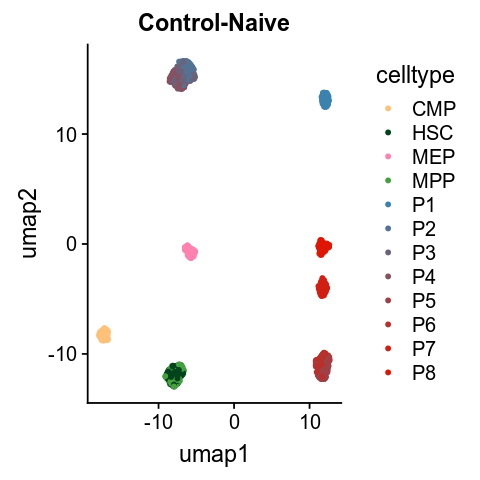

In [10]:
p_control <- plot_umap(df_umap_control,labels = labels,colormap = colormap,title='Control-Naive')
p_control

#### chromVAR

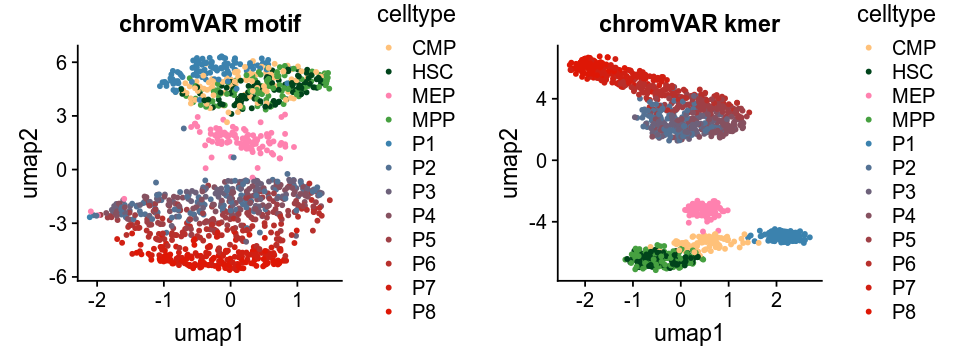

In [11]:
p_chromVAR_motif <- plot_umap(df_umap_chromVAR_motif,labels = labels,colormap = colormap,title='chromVAR motif')
p_chromVAR_kmer <- plot_umap(df_umap_chromVAR_kmer,labels = labels,colormap = colormap,title='chromVAR kmer')

options(repr.plot.width=8, repr.plot.height=3)
cowplot::plot_grid(p_chromVAR_motif,p_chromVAR_kmer)

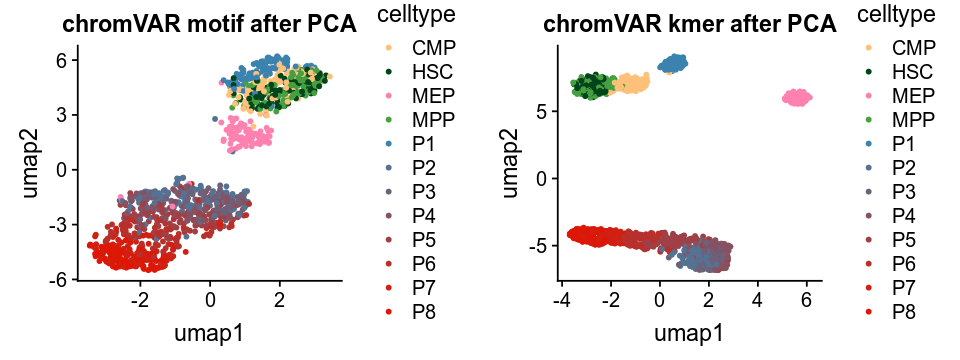

In [12]:
p_chromVAR_motif2 <- plot_umap(df_umap_chromVAR_motif2,labels = labels,colormap = colormap,title='chromVAR motif after PCA')
p_chromVAR_kmer2 <- plot_umap(df_umap_chromVAR_kmer2,labels = labels,colormap = colormap,title='chromVAR kmer after PCA')

options(repr.plot.width=8, repr.plot.height=3)
cowplot::plot_grid(p_chromVAR_motif2,p_chromVAR_kmer2)

### Cusanovich2018

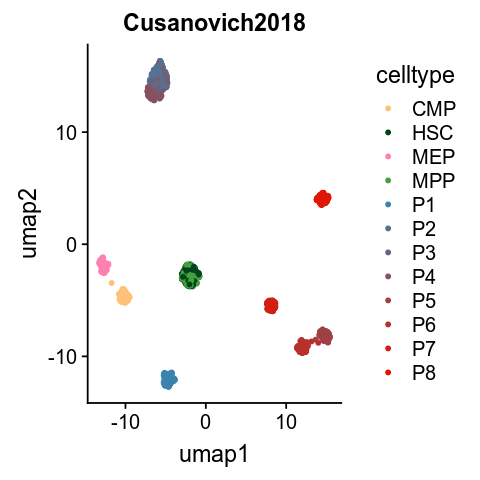

In [13]:
p_Cusanovich2018 <- plot_umap(df_umap_Cusanovich2018,labels = labels,colormap = colormap,title='Cusanovich2018')
p_Cusanovich2018

### cisTopic

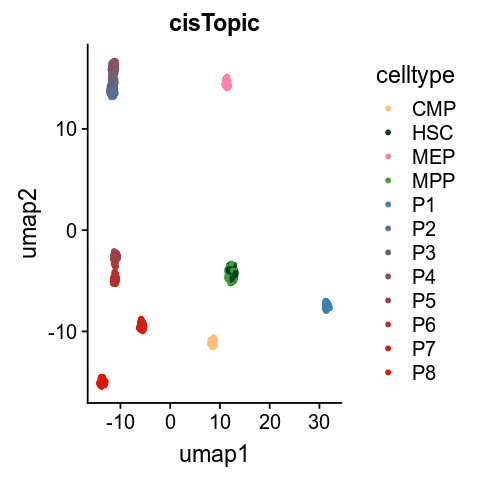

In [14]:
p_cisTopic <- plot_umap(df_umap_cisTopic,labels = labels,colormap = colormap,title='cisTopic')
p_cisTopic

### Gene Scoring

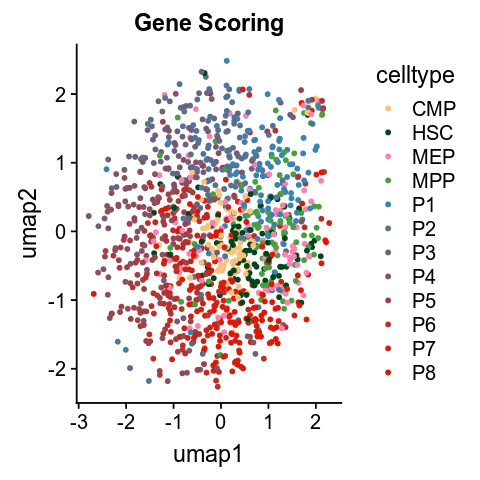

In [15]:
p_GeneScoring <- plot_umap(df_umap_GeneScoring,labels = labels,colormap = colormap,title='Gene Scoring')
p_GeneScoring

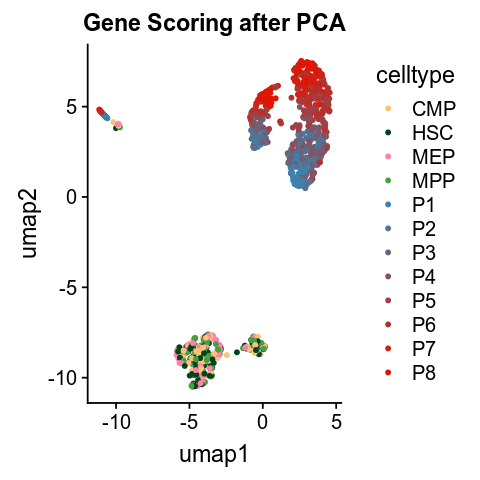

In [16]:
p_GeneScoring2 <- plot_umap(df_umap_GeneScoring2,labels = labels,colormap = colormap,title='Gene Scoring after PCA')
p_GeneScoring2

### Cicero

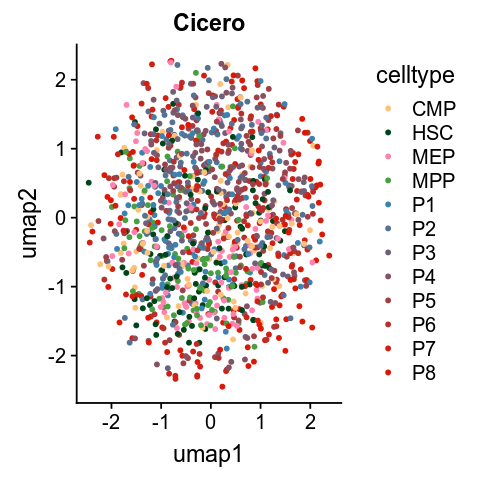

In [17]:
p_Cicero <- plot_umap(df_umap_Cicero,labels = labels,colormap = colormap,title='Cicero')
p_Cicero

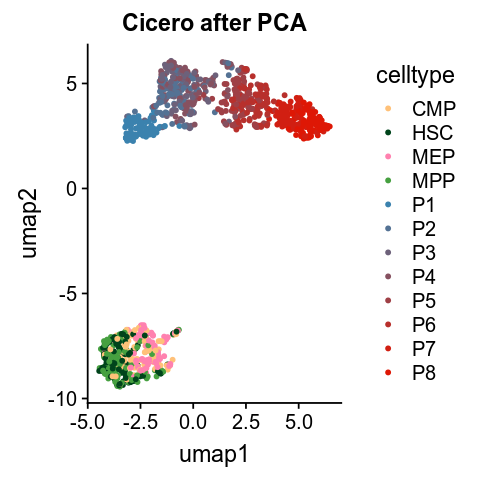

In [18]:
p_Cicero2 <- plot_umap(df_umap_Cicero2,labels = labels,colormap = colormap,title='Cicero after PCA')
p_Cicero2

### SnapATAC

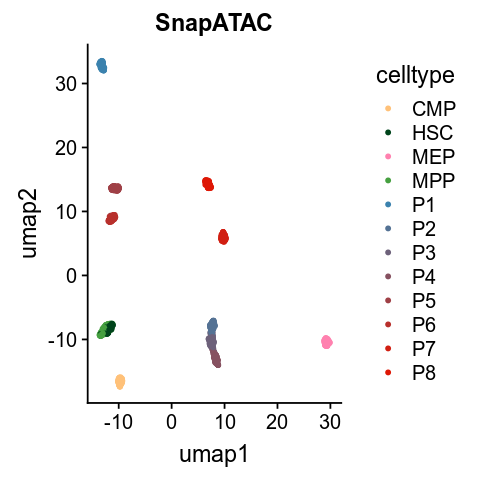

In [19]:
p_SnapATAC <- plot_umap(df_umap_SnapATAC,labels = labels,colormap = colormap,title='SnapATAC')
p_SnapATAC

### scABC

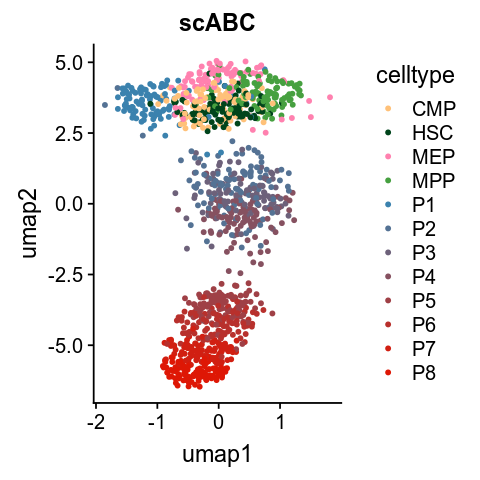

In [20]:
p_scABC <- plot_umap(df_umap_scABC,labels = labels,colormap = colormap,title='scABC')
p_scABC

### SCRAT

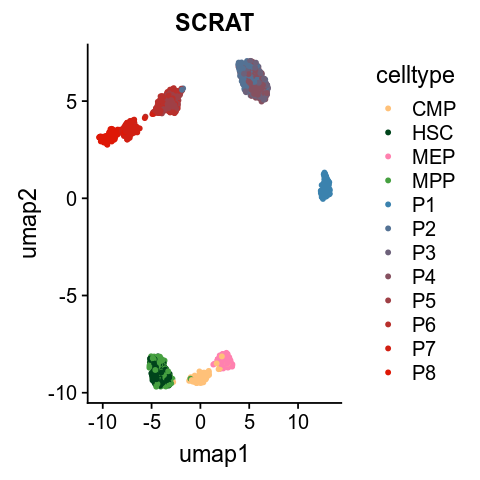

In [21]:
p_SCRAT <- plot_umap(df_umap_SCRAT,labels = labels,colormap = colormap,title='SCRAT')
p_SCRAT

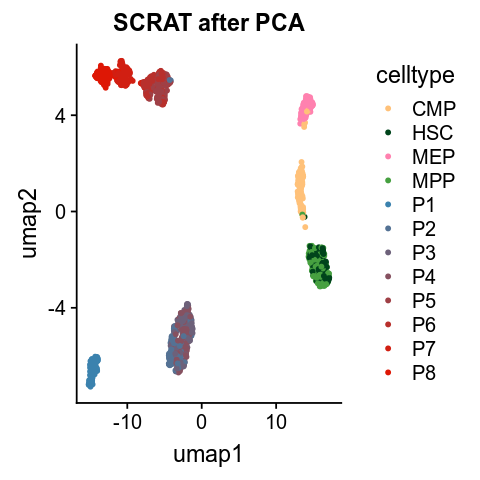

In [22]:
p_SCRAT2 <- plot_umap(df_umap_SCRAT2,labels = labels,colormap = colormap,title='SCRAT after PCA')
p_SCRAT2

### Scasat

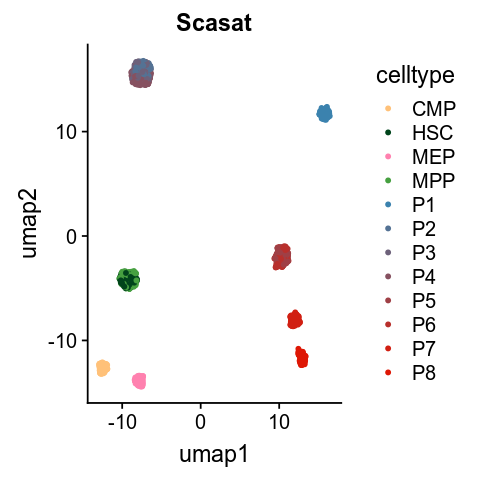

In [23]:
p_Scasat <- plot_umap(df_umap_Scasat,labels = labels,colormap = colormap,title='Scasat')
p_Scasat

### BROCKMAN

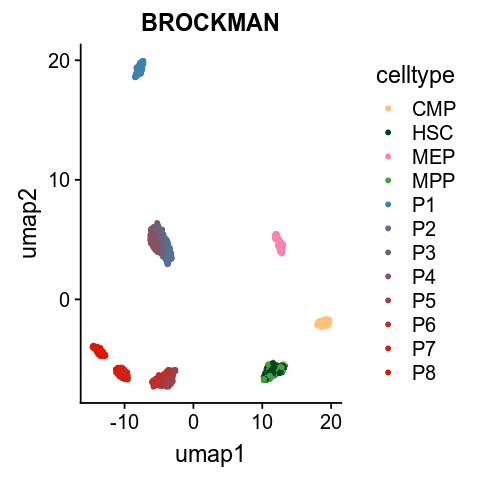

In [24]:
p_BROCKMAN <- plot_umap(df_umap_BROCKMAN,labels = labels,colormap = colormap,title='BROCKMAN')
p_BROCKMAN

In [25]:
figname = "erythropoesis_noisyp2.pdf"
fig_width = 4*6
fig_height = 4*3

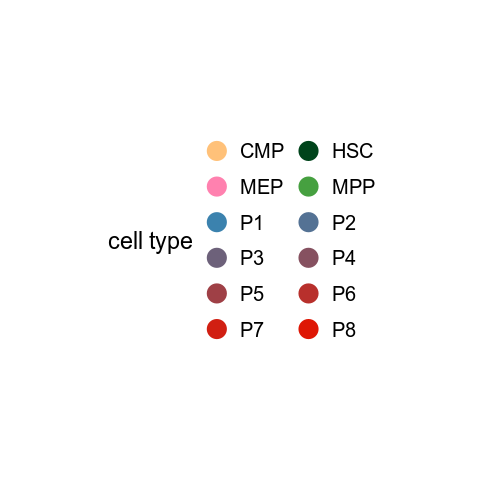

In [26]:
options(repr.plot.width=4, repr.plot.height=4)
leg <- cowplot::get_legend(p_control + theme(legend.direction = "horizontal", legend.position = c(0.2,0.5)) + 
                           labs(color='cell type')+
                           guides(color=guide_legend(nrow=6,byrow=TRUE,override.aes = list(size=5))))

p_legend = as_ggplot(leg)
p_legend

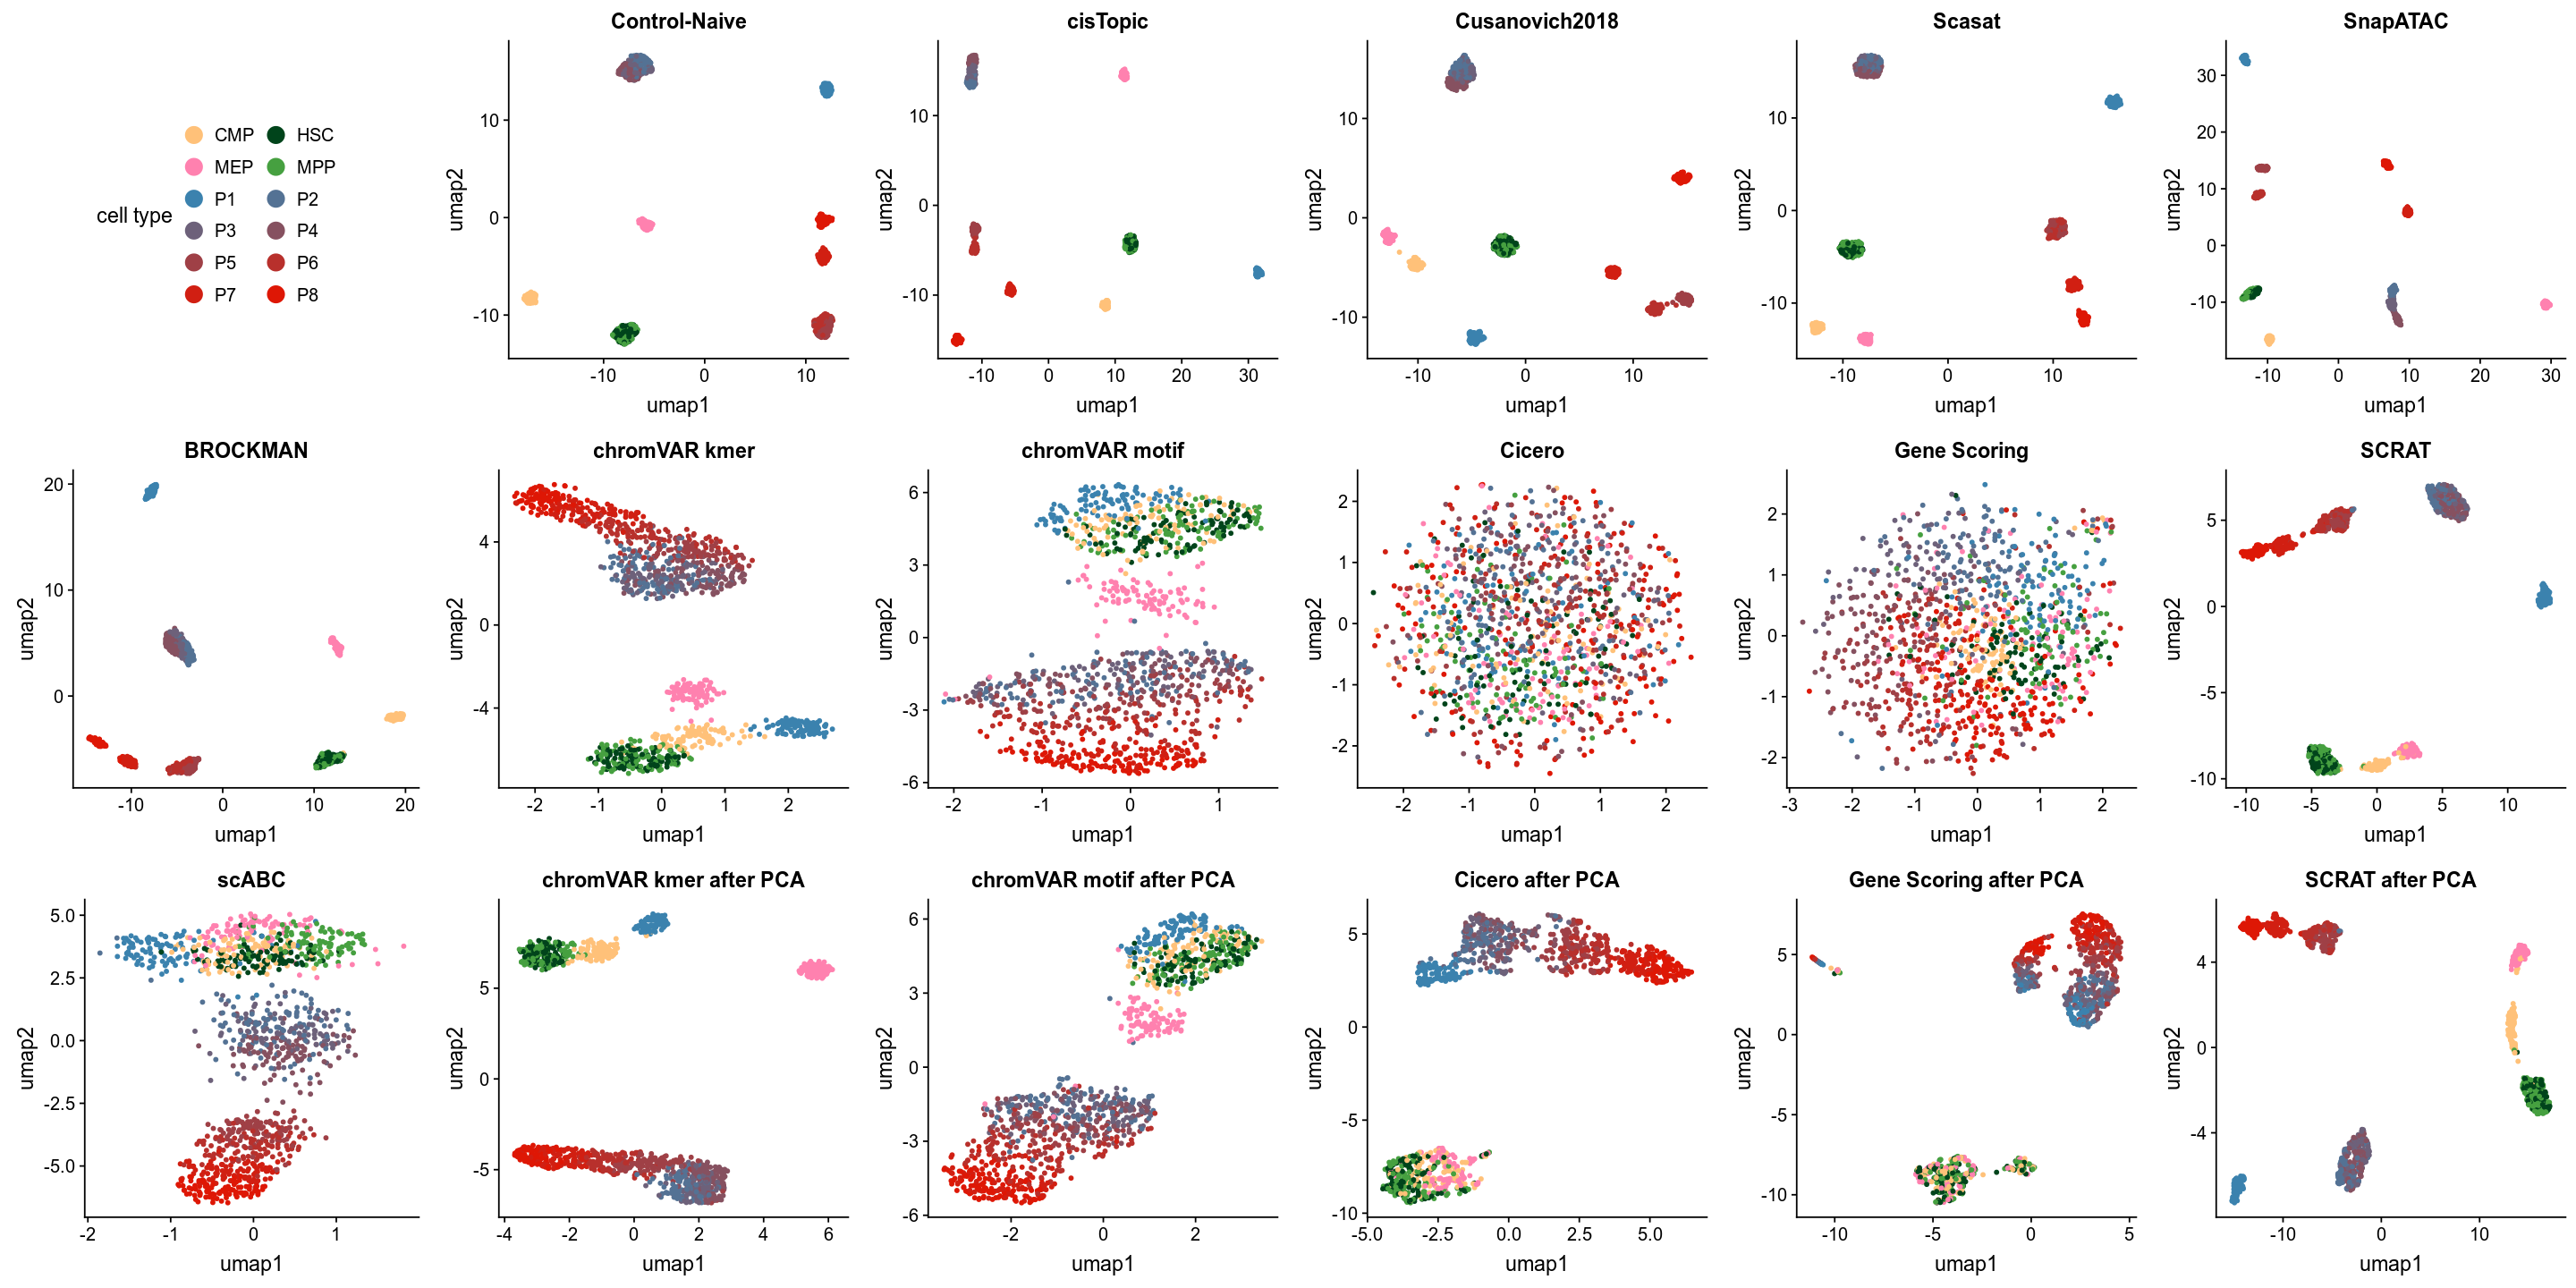

In [27]:
options(repr.plot.width=fig_width, repr.plot.height=fig_height)
p_figure = cowplot::plot_grid(p_legend,
                   p_control+theme(legend.position = "none"),
                   p_cisTopic+theme(legend.position = "none"),
                   p_Cusanovich2018+theme(legend.position = "none"),
                   p_Scasat+theme(legend.position = "none"),  
                   p_SnapATAC+theme(legend.position = "none"), 
                   p_BROCKMAN+theme(legend.position = "none"),
                   p_chromVAR_kmer+theme(legend.position = "none"),
                   p_chromVAR_motif+theme(legend.position = "none"),
                   p_Cicero+theme(legend.position = "none"),
                   p_GeneScoring+theme(legend.position = "none"),
                   p_SCRAT+theme(legend.position = "none"),
                   p_scABC+theme(legend.position = "none"),
                   p_chromVAR_kmer2+theme(legend.position = "none"),
                   p_chromVAR_motif2+theme(legend.position = "none"),
                   p_Cicero2+theme(legend.position = "none"),
                   p_GeneScoring2+theme(legend.position = "none"),
                   p_SCRAT2+theme(legend.position = "none"),
                   labels = "",ncol = 6)
p_figure

In [28]:
cowplot::ggsave(p_figure,filename = paste0(path_fig,figname), width = fig_width, height = fig_height)